# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In this assignment, you will continue to study the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
from sklearn.preprocessing import normalize


warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [239]:
std = pd.read_csv("StudentsPerformance.csv")
std.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [240]:
std.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**There is no skewed distribution for all scores.**

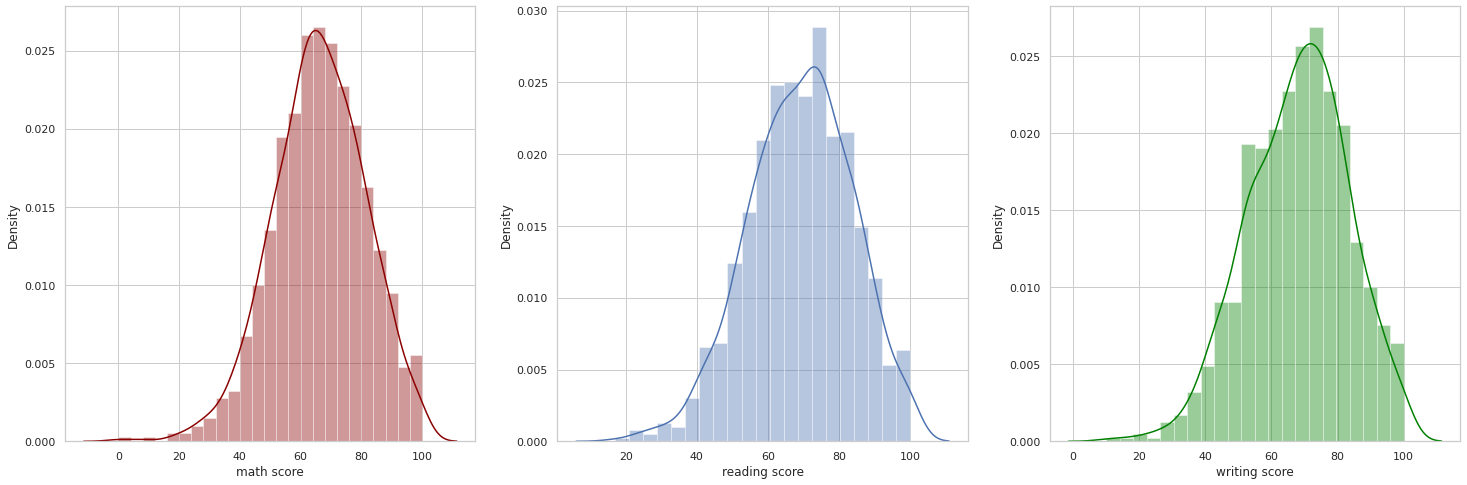

In [241]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
sns.distplot(std["math score"].dropna(), color="darkred")
plt.subplot(1,3,2)
sns.distplot(std["reading score"].dropna())
plt.subplot(1,3,3)
sns.distplot(std["writing score"].dropna(), color="green")
plt.show()

All of them look like normal distribution.

**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [242]:
average=(std["math score"]+std["reading score"]+std["writing score"])/3
std["average"]=average

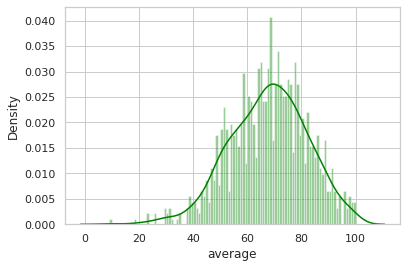

In [243]:

sns.distplot(std["average"].dropna(), color="green", bins=100)
plt.show()

**Seems like normal distribution but left of graph is a little different.**

In [244]:
std.describe()

,math score,reading score,writing score,average
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [245]:
from scipy.stats import zscore
z_scores = zscore(std["average"].dropna())
for threshold in range(1,4):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 165
------
Threshold value: 2
Number of Outliers: 19
------
Threshold value: 3
Number of Outliers: 0
------


{'boxes': [<matplotlib.lines.Line2D at 0x7fae254736d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fae25455710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fae2547c750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fae2547c210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fae25473c50>,
  <matplotlib.lines.Line2D at 0x7fae254551d0>]}

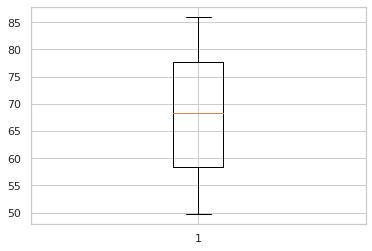

In [246]:
wins= winsorize(np.array(std.average.dropna()), (0.10, 0.10))
plt.boxplot(wins)

(array([160.,  65.,  76.,  77.,  96., 115.,  98.,  92.,  67., 154.]),
 array([49.66666667, 53.3       , 56.93333333, 60.56666667, 64.2       ,
        67.83333333, 71.46666667, 75.1       , 78.73333333, 82.36666667,
        86.        ]),
 <a list of 10 Patch objects>)

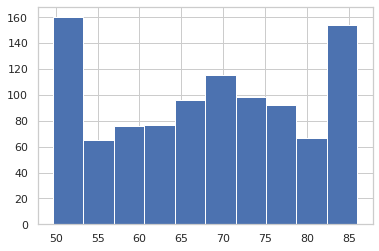

In [247]:
plt.hist(wins)

In [248]:
from scipy.stats import ttest_ind
ttest_value=stats.ttest_1samp(wins,70)
print(ttest_value)

Ttest_1sampResult(statistic=-5.278630393974232, pvalue=1.5965690632434915e-07)


In [249]:
std

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [250]:
std= pd.concat([std, pd.get_dummies(std["gender"])], axis=1)
std= pd.concat([std, pd.get_dummies(std["lunch"])], axis=1)
std= pd.concat([std, pd.get_dummies(std["race/ethnicity"])], axis=1)
std= pd.concat([std, pd.get_dummies(std["parental level of education"])], axis=1)
std= pd.concat([std, pd.get_dummies(std["test preparation course"])], axis=1)
std.drop(labels = ["lunch","gender","test preparation course","parental level of education","race/ethnicity"], axis = 1, inplace = True)

In [251]:
std.corr()

,math score,reading score,writing score,average,female,male,free/reduced,standard,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none
math score,1.000000,0.817580,0.802642,0.918746,-0.167982,0.167982,-0.350877,0.350877,-0.091977,-0.084250,-0.073387,0.050071,0.205855,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,0.177702,-0.177702
reading score,0.817580,1.000000,0.954598,0.970331,0.244313,-0.244313,-0.229560,0.229560,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,0.241780,-0.241780
writing score,0.802642,0.954598,1.000000,0.965667,0.301225,-0.301225,-0.245769,0.245769,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,0.312946,-0.312946
average,0.918746,0.970331,0.965667,1.000000,0.130861,-0.130861,-0.290064,0.290064,-0.104803,-0.078247,-0.030691,0.058902,0.141050,0.067414,0.106599,-0.161936,0.102411,0.026761,-0.087247,0.256710,-0.256710
female,-0.167982,0.244313,0.301225,0.130861,1.000000,-1.000000,0.021372,-0.021372,-0.071001,0.028466,0.063368,-0.030566,-0.020302,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,-0.006028,0.006028
male,0.167982,-0.244313,-0.301225,-0.130861,-1.000000,1.000000,-0.021372,0.021372,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.006028,-0.006028
free/reduced,-0.350877,-0.229560,-0.245769,-0.290064,0.021372,-0.021372,1.000000,-1.000000,0.032329,0.008257,0.003385,0.009458,-0.052398,-0.009102,0.013668,0.002211,0.027095,-0.006146,-0.013874,0.017044,-0.017044
standard,0.350877,0.229560,0.245769,0.290064,-0.021372,0.021372,-1.000000,1.000000,-0.032329,-0.008257,-0.003385,-0.009458,0.052398,0.009102,-0.013668,-0.002211,-0.027095,0.006146,0.013874,-0.017044,0.017044
group A,-0.091977,-0.096274,-0.110714,-0.104803,-0.071001,0.071001,0.032329,-0.032329,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,-0.006315,0.006315
group B,-0.084250,-0.060283,-0.078254,-0.078247,0.028466,-0.028466,0.008257,-0.008257,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.000106,0.000106


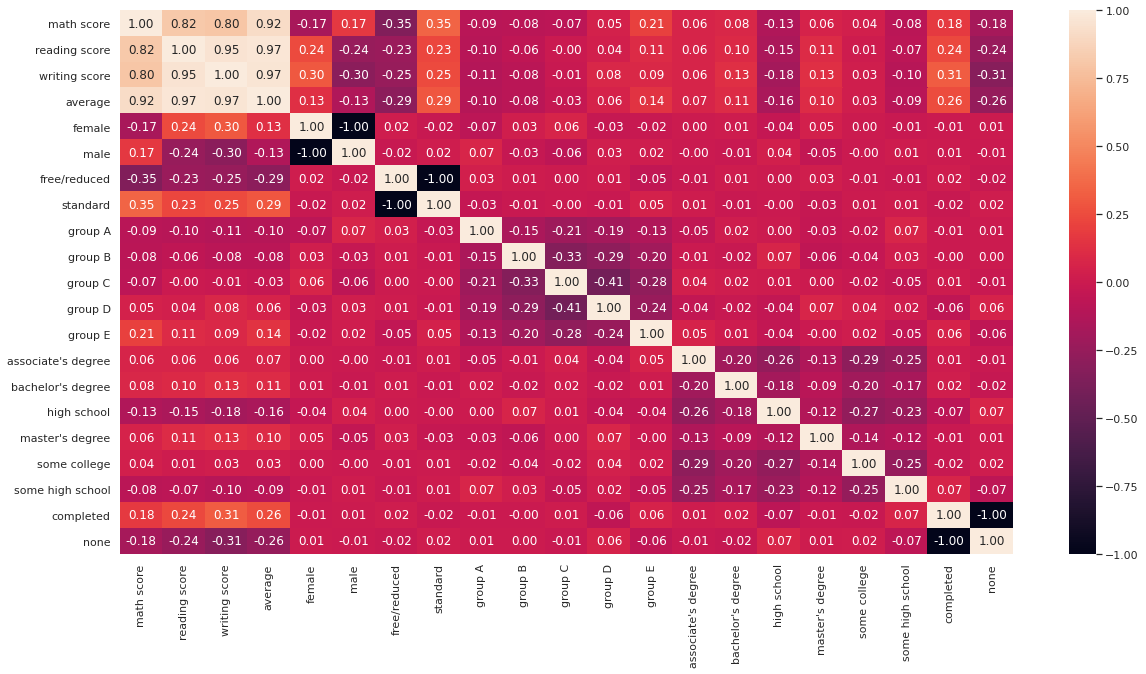

In [252]:
plt.figure(figsize=(20,10))
p = sns.heatmap(std.corr(),fmt=".2f", annot=True)

plt.show()

**Math score, reading score, and writing scores are most related to the average column.** 

**We should keep test preparation course,lunch, goup E origin and all scores  values. Scores affect each other to explain the factors that determine the success of the exam.**



**(4)** Does the test preparation course have an impact on the target variable you created?

**Yes,low effect. There is a correlation between test preparation course and average but it is low value. (0.256710) If student has a preparation, his/her average score is higher.**